In [257]:
# Import dependencies
import json
import pandas as pd
import numpy as np
import re

In [13]:
file_dir = ".\Data"

In [14]:
with open(f'{file_dir}\wikipedia.movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [15]:
len(wiki_movies_raw)

7311

In [16]:
# First Five Raw Wiki records
#wiki_movies_raw[:5]

In [17]:
# Last Five Raw Wiki records
#wiki_movies_raw[:5]

In [18]:
# Some Raw Wiki records in between
#wiki_movies_raw[3600:3605]

In [7]:
wiki_movies_raw[2]['Starring'][1]

'Robert Downey Jr.'

In [28]:
kaggle_metadata_df = pd.read_csv(f'{file_dir}\movies_metadata.csv')
ratings_df = pd.read_csv('ratings.csv')

In [212]:
kaggle_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [39]:
ratings_df.sample(n=10)

,userId,movieId,rating,timestamp
14001477,145498,110,3.0,1194828345
2665686,27685,2011,2.0,970002995
11101530,114889,3160,5.0,976214676
7985466,82318,208,2.0,1173976364
25273328,263109,1425,3.0,974051537
24180415,251197,1201,3.0,875466882
17834826,185068,2391,5.0,947553220
2866925,29863,2826,2.0,1221479218
4070990,42340,2739,4.0,1049329267
25923115,269843,2467,4.0,954186099


In [41]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [42]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [49]:
# Filter for movies with Director or Directed by not null and with imdb link
# wiki_movies = [movie for movie in wiki_movies_raw if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie]

# Remove tv shows to the previous filter
wiki_movies = [movie for movie in wiki_movies_raw if ('Director' in movie or 'Directed by' in movie) 
               and 'imdb_link' in movie and 'No. of episodes' not in movie]

In [50]:
len(wiki_movies)

7076

In [83]:
sorted(movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [86]:
movies_df = pd.DataFrame(wiki_movies)
# movies_df.head()
movies_df[movies_df['Recorded'].notnull()]['Recorded']


963     November 19, 1993
1347                 1995
Name: Recorded, dtype: object

In [90]:
def clean_movie(movie):
    movie = dict(movie)
    # Combine alternate titles into one list
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
            
        if len(alt_titles) > 0:
            movie['alt_titles'] = alt_titles
            
        # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
            
    return movie

In [91]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)

In [92]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Followed by,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [97]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [99]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [100]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [101]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [127]:
wiki_movies_df.dtypes
box_office = wiki_movies_df['Box office'].dropna()

In [128]:
box_office.head()

0       $21.4 million
1        $2.7 million
2         $57,718,089
3          $7,331,647
4    $6,939,946 (USA)
Name: Box office, dtype: object

In [129]:
#def is_not_a_string(x):
#    return type(x) != str

#box_office[box_office.map(is_not_a_string)]

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [130]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [131]:
box_office[0:9]

0        $21.4 million
1         $2.7 million
2          $57,718,089
3           $7,331,647
4     $6,939,946 (USA)
9             $855,810
10      $195.3 million
11       $53.2 million
12       $15.7 million
Name: Box office, dtype: object

In [148]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3909

In [149]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1559

In [150]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [151]:
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [152]:
# Define parse_dollars to clean Box office data
def parse_dollars(s):
    # if s in not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on',s, flags=re.IGNORECASE):
        # remove the $ sign and 'million'
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # covert to a float by multiplying by millions
        value = float(s)*10**6
        return value
        
        
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on',s, flags=re.IGNORECASE):
        # remove the $ sign and 'billion'
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        # covert to a float by multiplying by billions
        value = float(s)*10**9
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)
        # convert to a float
        value = float(s)
        return value
        
    # otherwise return NaN
    else:
        return np.nan

In [153]:
# extract and transform all of the box office values
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
# remove the old box office column
wiki_movies_df.drop('Box office', axis=1, inplace=True)


In [188]:
len(wiki_movies_df['box_office'])

7033

In [170]:
# drop Nan from the Budget column and store it in budget
budget = wiki_movies_df['Budget'].dropna()

In [172]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [173]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [174]:
budget[973]

'$26 [2] –34 [3] [4] million'

In [175]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [180]:
budget[974]

'$16 million'

In [181]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [184]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [185]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [187]:
len(wiki_movies_df['budget'])

7033

In [189]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [190]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [194]:
# Save the search strings for the four general forms of dates
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

#extract the release date, convert to date and time format, store it in the new column 'release_date'
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)


In [198]:
# Extract movie run time data, drop Nan, extract list entries
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
len(running_time)

6894

In [199]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [200]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [203]:
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE).sum()

6891

In [204]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [205]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [206]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [207]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [208]:
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [209]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [213]:
kaggle_metadata_df.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
20102,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,47953,tt0179841,en,Harem Suare,A story of the impossible love between one of ...,...,1999-11-24,0.0,125.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Harem suare,False,6.3,12.0
17123,False,NaN,8500000,"[{'id': 27, 'name': 'Horror'}]",NaN,47518,tt1017464,en,The Tortured,An upper-middle-class couple's life is destroy...,...,2010-06-15,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How far would you go?,The Tortured,False,5.3,53.0
23241,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",NaN,166621,tt0020713,en,Bright Lights,"In this light-hearted musical, an early color ...",...,1930-09-20,0.0,69.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What a Cast and Story - Crammed With Drama -- ...,Bright Lights,False,0.0,1.0
25797,False,NaN,49000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",http://www.chappie-movie.com,198184,tt1823672,en,Chappie,Every child comes into the world full of promi...,...,2015-03-04,104399548.0,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I am consciousness. I am alive. I am Chappie.,Chappie,False,6.6,3124.0
36468,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,36301,tt0268677,en,The Tangerine Bear: Home in Time for Christmas!,"When Tangie, a teddy bear goes into the Smile-...",...,2000-01-01,0.0,48.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Released,NaN,The Tangerine Bear: Home in Time for Christmas!,False,6.1,8.0
19397,False,NaN,70000000,"[{'id': 35, 'name': 'Comedy'}]",http://www.sonypictures.com/movies/thatsmyboy/,87428,tt1232200,en,That's My Boy,"While in his teens, Donny fathered a son, Todd...",...,2012-06-14,58058367.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The story of a child… and his son.,That's My Boy,False,5.5,460.0
1288,False,NaN,2000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,37843,tt0082083,en,Blood Beach,Something or someone is attacking people one b...,...,1980-09-01,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just when you thought it was safe to go back i...,Blood Beach,False,4.9,18.0
28666,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",NaN,283302,tt2866660,en,Lost for Life,A documentary about juveniles who are serving ...,...,2013-06-22,0.0,75.0,[],Released,Could you forgive?,Lost for Life,False,5.6,8.0
15602,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190,tt2700330,en,The Two Escobars,"Pablo Escobar was the richest, most powerful d...",...,2010-06-22,0.0,100.0,[],Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.6,14.0
2318,False,NaN,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,10312,tt0129290,en,Patch Adams,"Meet Patch Adams, a doctor who doesn't look, a...",...,1998-12-25,202292902.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Laughter is contagious,Patch Adams,False,7.0,863.0


In [214]:
kaggle_metadata_df[~kaggle_metadata_df['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
kaggle_metadata_df = kaggle_metadata_df[kaggle_metadata_df['adult'] == 'False'].drop('adult',axis='columns')

In [219]:
kaggle_metadata_df['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [221]:
kaggle_metadata_df['video'] = kaggle_metadata_df['video'] == 'True'

In [224]:
kaggle_metadata_df['budget'] = kaggle_metadata_df['budget'].astype(int)
kaggle_metadata_df['id'] = pd.to_numeric(kaggle_metadata_df['id'], errors='raise')
kaggle_metadata_df['popularity'] = pd.to_numeric(kaggle_metadata_df['popularity'], errors='raise')

In [225]:
kaggle_metadata_df['release_date'] = pd.to_datetime(kaggle_metadata_df['release_date'])

In [226]:
kaggle_metadata_df['release_date'].head()

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]

In [228]:
ratings_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [230]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

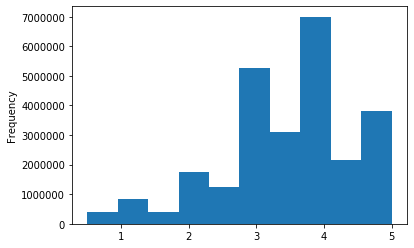

In [231]:
ratings_df['rating'].plot(kind='hist')
ratings_df['rating'].describe()

In [233]:
movies_merge_df = pd.merge(wiki_movies_df, kaggle_metadata_df, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [234]:
movies_merge_df.head()

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.2,72.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,1990-08-24,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.5,17.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,1990-08-10,33461269.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.3,146.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,1990-12-25,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.3,57.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,1990-12-21,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.6,23.0


In [236]:
movies_merge_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [238]:
movies_merge_df[movies_merge_df['title_wiki'] != movies_merge_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [240]:
movies_merge_df[(movies_merge_df['title_kaggle'] == '') | (movies_merge_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [243]:
movies_merge_df = movies_merge_df.drop('title_wiki', axis = 1)

In [244]:
movies_merge_df.head()

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,Renny Harlin,...,1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.2,72.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,James Foley,...,1990-08-24,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.5,17.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",Roger Spottiswoode,...,1990-08-10,33461269.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.3,146.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,Woody Allen,...,1990-12-25,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.3,57.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,John Cornell,...,1990-12-21,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.6,23.0


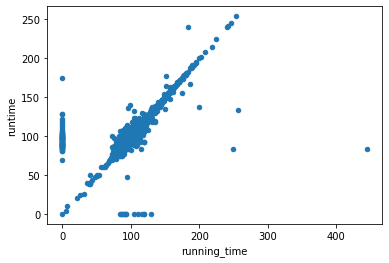

In [245]:
movies_merge_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [261]:
#Set the kaggle movies runtime to the wiki movies running_time if kaggle movies is zero, otherwise keep kaggle movies runtime
movies_merge_df['runtime'] = np.where(movies_merge_df['runtime'] == 0, movies_merge_df['running_time'], movies_merge_df['runtime'])

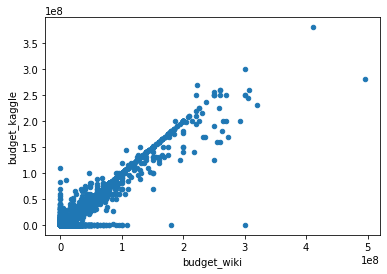

In [263]:
movies_merge_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [264]:
#Set the kaggle movies budget to the wiki movies budget if kaggle movies is zero, otherwise keep kaggle movies budget
movies_merge_df['budget_kaggle'] = np.where(movies_merge_df['budget_kaggle'] == 0, movies_merge_df['budget_wiki'], movies_merge_df['budget_kaggle'])

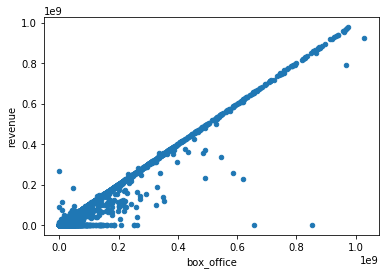

In [266]:
movies_merge_df.fillna(0)[movies_merge_df['revenue'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

In [267]:
#Set the kaggle movies budget to the wiki movies budget if kaggle movies is zero, otherwise keep kaggle movies budget
movies_merge_df['revenue'] = np.where(movies_merge_df['revenue'] == 0, movies_merge_df['box_office'], movies_merge_df['revenue'])

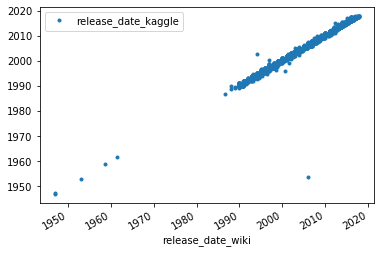

In [270]:
movies_merge_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [273]:
movies_merge_df[(movies_merge_df['release_date_wiki'] > '1996-01-01') & (movies_merge_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [274]:
movies_merge_df = movies_merge_df.drop(movies_merge_df[(movies_merge_df['release_date_wiki'] > '1996-01-01') & (movies_merge_df['release_date_kaggle'] < '1965-01-01')].index)

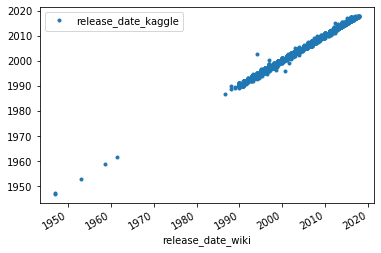

In [275]:
movies_merge_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [276]:
movies_merge_df[movies_merge_df['release_date_wiki'].isnull()]

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,Jonathan Winfrey,...,1995-08-22,NaN,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.1,7.0
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,Hal Hartley,...,1995-09-14,NaN,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.5,4.0
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,Eleanor Bergstein,...,1995-11-17,NaN,95.0,[],Released,NaN,Let It Be Me,False,8.0,2.0
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,Frank Rainone,...,1998-01-01,NaN,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.0,1.0
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,"[Noah Baumbach, (as Ernie Fusco)]",...,1997-01-01,NaN,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.5,4.0
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,Phillip J. Roth,...,1999-02-22,NaN,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.7,6.0
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,Jordan Walker-Pearlman,...,2000-01-01,NaN,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.0,0.0
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,Steve James,...,2002-09-09,97000.0,140.0,[],NaN,NaN,Stevie,False,6.7,13.0
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,Bille August,...,2004-09-17,NaN,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.9,13.0
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,"[Gregg Kavet, Andy Robin]",...,2006-03-11,NaN,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.5,8.0


In [277]:
movies_merge_df = movies_merge_df.drop('release_date_wiki', axis = 1)

In [278]:
movies_merge_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                                 5479
[English, Spanish]                        68
[English, French]                         35
[English, Japanese]                       25
[English, Russian]                        23
                                        ... 
[English, Scottish Gaelic]                 1
[English, French, Kinyarwanda]             1
English, Arabic, Lakota                    1
[Japanese, English, Cantonese]             1
[Albanian, English, French, Spanish]       1
Name: Language, Length: 197, dtype: int64

In [279]:
movies_merge_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                              5479
NaN                                   134
(English, Spanish)                     68
(English, French)                      35
(English, Japanese)                    25
                                     ... 
Various languages                       1
(English, German, Hebrew)               1
(English, Mandarin, Shanghainese)       1
(English, Scottish Gaelic, Irish)       1
(English, Vietnamese, French)           1
Name: Language, Length: 198, dtype: int64

In [280]:
movies_merge_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
zh       4
pt       4
hi       2
da       2
cn       1
ko       1
tr       1
sv       1
ar       1
ru       1
he       1
ab       1
Name: original_language, dtype: int64

In [281]:
movies_merge_df = movies_merge_df.drop('Language', axis = 1)

In [282]:
movies_merge_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [288]:
movies_merge_df = movies_merge_df.drop('Production company(s)', axis = 1)

In [289]:
for col in movies_merge_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_merge_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [291]:
movies_merge_df = movies_merge_df.drop('video', axis = 1)

In [292]:
movies_merge_df = movies_merge_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [293]:
movies_merge_df.head()

,imdb_id,id,title_kaggle,original_title,tagline,belongs_to_collection,url,imdb_link,runtime,budget_kaggle,...,production_countries,Distributor,Producer(s),Director,Starring,Cinematography,Editor(s),Writer(s),Composer(s),Based on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,49000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,6000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,35000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,12000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,25000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN


In [294]:
movies_merge_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [296]:
movies_merge_df.head()

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,production_countries,distributor,producers,director,starring,cinematography,editors,writers,composers,based_on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,49000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,6000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,35000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,12000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,25000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN


In [310]:
# Get a count of the number of users for each rating for each movie
rating_counts = ratings_df.groupby(['movieId','rating'], as_index=False).count()

In [311]:
# Same as the previous line with rename userId --> count (the userId count for each rating)
rating_counts = ratings_df.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) 

In [312]:
rating_counts[rating_counts['movieId']==1]

,movieId,rating,count,timestamp
0,1,0.5,441,441
1,1,1.0,804,804
2,1,1.5,438,438
3,1,2.0,2083,2083
4,1,2.5,1584,1584
5,1,3.0,11577,11577
6,1,3.5,5741,5741
7,1,4.0,22020,22020
8,1,4.5,5325,5325
9,1,5.0,15995,15995


In [313]:
# Add rating identifier to each column name to prepare for merge with movies_merge_df
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [314]:
rating_counts

,rating_movieId,rating_rating,rating_count,rating_timestamp
0,1,0.5,441,441
1,1,1.0,804,804
2,1,1.5,438,438
3,1,2.0,2083,2083
4,1,2.5,1584,1584
...,...,...,...,...
239376,176267,4.0,1,1
239377,176269,3.5,1,1
239378,176271,5.0,1,1
239379,176273,1.0,1,1


In [315]:
movies_with_ratings_df = pd.merge(movies_merge_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [316]:
movies_with_ratings_df.sample(10)

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,starring,cinematography,editors,writers,composers,based_on,rating_movieId,rating_rating,rating_count,rating_timestamp
2988,tt0323939,14576,Shade,Shade,"Lie, cheat, steal... your deal!",NaN,https://en.wikipedia.org/wiki/Shade_(film),https://www.imdb.com/title/tt0323939/,101.0,6800000.0,...,"[Stuart Townsend, Gabriel Byrne, Thandie Newto...",NaN,NaN,Damian Nieman,James Johnzen,NaN,1590.0,1.0,829.0,829.0
5971,tt3228088,322487,Spark: A Space Tail,Spark: A Space Tail,Spark a revolution!,NaN,https://en.wikipedia.org/wiki/Spark_(2016_film),https://www.imdb.com/title/tt3228088/,97.0,NaN,...,"[Jace Norman, Jessica Biel, Susan Sarandon, Pa...",NaN,"[Paul Hunter, Aaron Woodley]","[Doug Hadders, Adam Rotstein, Aaron Woodley]",Robert Duncan,NaN,NaN,NaN,NaN,NaN
1503,tt0118055,9302,Up Close & Personal,Up Close & Personal,"Every Day we Have, is One More Than We Deserve.",NaN,https://en.wikipedia.org/wiki/Up_Close_%26_Per...,https://www.imdb.com/title/tt0118055/,119.0,60000000.0,...,"[Robert Redford, Michelle Pfeiffer, Stockard C...",Karl Walter Lindenlaub,Debra Neil-Fisher,"[Joan Didion, John Gregory Dunne]",Thomas Newman,"[Golden Girl: The Story of Jessica Savitch, by...",1002.0,2.0,7.0,7.0
3327,tt0386588,8488,Hitch,Hitch,The cure for the common man.,NaN,https://en.wikipedia.org/wiki/Hitch_(film),https://www.imdb.com/title/tt0386588/,118.0,70000000.0,...,"[Will Smith, Eva Mendes, Kevin James, Amber Va...",Andrew Dunn,"[Troy Takaki, Tracey Wadmore-Smoth]",Kevin Bisch,"[George Fenton, Alan Elliott]",NaN,914.0,4.5,1144.0,1144.0
6025,tt5884234,410554,First Kill,First Kill,"When you only have one shot, don't miss.",NaN,https://en.wikipedia.org/wiki/First_Kill_(2017...,https://www.imdb.com/title/tt5884234/,97.0,NaN,...,"[Hayden Christensen, Bruce Willis, Gethin Anth...",Brandon Cox,NaN,Nick Gordon,"[Ryan Franks, Scott Nickoley]",NaN,NaN,NaN,NaN,NaN
3405,tt0377109,10320,The Ring Two,The Ring Two,The dead don't sleep.,"{'id': 14563, 'name': 'The Ring Collection', '...",https://en.wikipedia.org/wiki/The_Ring_Two,https://www.imdb.com/title/tt0377109/,110.0,50000000.0,...,"[Naomi Watts, Simon Baker, David Dorfman, Eliz...",Gabriel Beristain,Michael N. Knue,Ehren Kruger,"[Henning Lohner, Martin Tillman]","[Ring, by, Koji Suzuki]",1113.0,0.5,6.0,6.0
5856,tt2660888,188927,Star Trek Beyond,Star Trek Beyond,NaN,"{'id': 115575, 'name': 'Star Trek: Alternate R...",https://en.wikipedia.org/wiki/Star_Trek_Beyond,https://www.imdb.com/title/tt2660888/,122.0,185000000.0,...,"[John Cho, Simon Pegg, Chris Pine, Zachary Qui...",Stephen F. Windon,"[Kelly Matsumoto, Dylan Highsmith, Greg D'Auri...","[Simon Pegg, Doug Jung]",Michael Giacchino,"[Star Trek, by, Gene Roddenberry]",127341.0,2.5,1.0,1.0
2369,tt0134983,10384,Supernova,Supernova,"In the farthest reaches of space, something ha...",NaN,https://en.wikipedia.org/wiki/Supernova_(2000_...,https://www.imdb.com/title/tt0134983/,91.0,90000000.0,...,"[James Spader, Angela Bassett, Robert Forster,...",Lloyd Ahern II,"[Michael Schweiter, Melissa Kent, Francis Ford...","[William Malone, Daniel Chuba]",David C. Williams,NaN,1119.0,5.0,20.0,20.0
5375,tt0882977,134411,Snitch,Snitch,How far would you go to save your son?,NaN,https://en.wikipedia.org/wiki/Snitch_(film),https://www.imdb.com/title/tt0882977/,112.0,35000000.0,...,"[Dwayne Johnson, Barry Pepper, Susan Sarandon,...",Dana Gonzales,Jonathan Chibnall,"[Justin Haythe, Ric Roman Waugh]",Antonio Pinto,NaN,81049.0,3.0,2.0,2.0
3056,tt0337921,9759,Cellular,Cellular,If the signal dies so does she,NaN,https://en.wikipedia.org/wiki/Cellular_(film),https://www.imdb.com/title/tt0337921/,94.0,25000000.0,...,"[Kim Basinger, Chris Evans, Jason Statham, Eri...",Gary Capo,Eric Sears,Larry Cohen,John Ottman,NaN,1050.0,0.5,6.0,6.0


In [317]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)